1. 

En el archivo "logistic_regression_df_class" hemos visto un ejemplo multiclase. Elimina del dataframe todas las filas que se correspondan con la clase valor "1".

Ahora, realiza el ejercicio con el nuevo dataframe:

- ¿Se mejora la precisión del algoritmo con dos clases? ¿por qué?

LogisticRegression() es una clase que tiene varios parámetros de entrada. Investiga (toca, modifica, prueba) las variables y comenta si hay alguna de ellas que, modificándola, mejore el porcentaje de acierto del problema.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [2]:
win = pd.read_csv("https://raw.githubusercontent.com/Gabvaztor/data_science_jun_2020/master/week8/day3/data/usuarios_win_mac_lin.csv")
win.head()

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2


In [3]:
win_no1 = win[~(win["clase"] == 1)]
win_no1.clase.unique()

array([2, 0], dtype=int64)

In [4]:
X = win_no1.drop("clase", 1)
y = win_no1.clase

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [6]:
model = LogisticRegression()

In [7]:
model.fit(X_train, y_train)

LogisticRegression()

In [8]:
y_pred = model.predict(X_test)

In [9]:
y_test.tolist()

[2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0]

In [10]:
df_pred = pd.DataFrame({"clase":y_test, "prediction": y_pred})
df_pred["acierto"] = np.where(df_pred["clase"] == df_pred["prediction"], True, False)

In [11]:
df_pred

,clase,prediction,acierto
39,2,2,True
162,0,0,True
116,2,2,True
77,0,0,True
164,0,2,False
167,0,0,True
66,0,0,True
95,2,2,True
149,0,0,True
131,0,0,True


In [12]:
con_fun = confusion_matrix(y_test, y_pred)
con_fun

array([[16,  1],
       [ 0,  9]], dtype=int64)

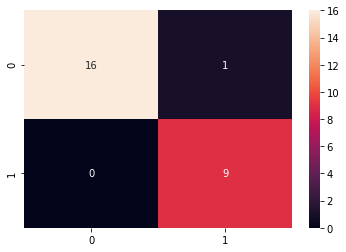

In [13]:
sns.heatmap(con_fun, annot=True)

In [14]:
print(f"El método '.score' en los modelos de clasificación es lo mismo que la función accuracy_score.\nPor este motivo para este modelo:\nEl score es: {model.score(X_test, y_test)} y \nel accuracy_score es {accuracy_score(y_test, y_pred)}")


El método '.score' en los modelos de clasificación es lo mismo que la función accuracy_score.
Por este motivo para este modelo:
El score es: 0.9615384615384616 y 
el accuracy_score es 0.9615384615384616


**LogisticRegression() es una clase que tiene varios parámetros de entrada. Investiga (toca, modifica, prueba) las variables y comenta si hay alguna de ellas que, modificándola, mejore el porcentaje de acierto del problema.**

In [15]:
model_grid = LogisticRegression()
param_grid = {'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['liblinear']}

# parámetros cogidos de esta página
# https://towardsdatascience.com/logistic-regression-model-tuning-with-scikit-learn-part-1-425142e01af5

LogisticRegression().get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [16]:
clf = GridSearchCV(model_grid, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

In [17]:
best_clf = clf.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.9s finished


In [18]:
best_clf

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             verbose=True)

In [19]:
print("tuned hyperparameters >> best parameters <<: ",best_clf.best_params_)
print("accuracy:",best_clf.best_score_)

tuned hyperparameters >> best parameters <<:  {'C': 4.281332398719396, 'penalty': 'l1', 'solver': 'liblinear'}
accuracy: 0.9323809523809524
